### Census Data Explorer: Rental Prices in Los Angeles

Greer Cowan

This notebook includes data pulled from social explorer showing change in average rental prices in Los Angeles by Census Tract. This is an indicator that will help to identify neighborhoods in LA that are high rental prices, and in turn are many have a large number of households that are vulnerable to displacement. The data is adjusted for inflation to 2021.


In [1]:
import pandas as pd

First, I read the CVS file that I downloaded from Social Explorer. It included data on median gross rent by Census Tract in LA County.

In [2]:
df = pd.read_csv('Census_Data_MedianGrossRent.csv',
                dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [3]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A18009_001
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1736.0
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2287.0
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1422.0
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1293.0
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2627.0


Next, I dropped all columns that did not have any data. 

In [4]:
df = df.dropna(axis=1,how="all")

In [5]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A18009_001
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,37,101110,1736.0
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,37,101122,2287.0
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,37,101210,1422.0
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,37,101220,1293.0
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,37,101300,2627.0


Next, I renamed the two columns of intertest – median gross rent and the geo fips identifier

In [6]:
df.rename(columns={'SE_A18009_001':'Median Gross Rent', 'Geo_FIPS':'FIPS'}, inplace=True)

In [7]:
df.head()

,FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Median Gross Rent
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,37,101110,1736.0
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,37,101122,2287.0
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,37,101210,1422.0
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,37,101220,1293.0
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,37,101300,2627.0


Then I looked at the descriptive statistics for the data and make a histogram of the median gross rent prices.

In [8]:
df.describe()

,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_TRACT,Median Gross Rent
count,2346.0,2346.0,2346.000000,2346.000000,2289.000000
mean,140.0,0.0,5042.500000,408065.361040,1663.489734
std,0.0,0.0,677.376188,228117.570824,548.021544
min,140.0,0.0,3870.000000,101110.000000,350.000000
25%,140.0,0.0,4456.250000,211550.250000,1277.000000
50%,140.0,0.0,5042.500000,404852.000000,1502.000000
75%,140.0,0.0,5628.750000,552675.500000,1904.000000
max,140.0,0.0,6215.000000,990300.000000,3777.000000


<AxesSubplot: ylabel='Frequency'>

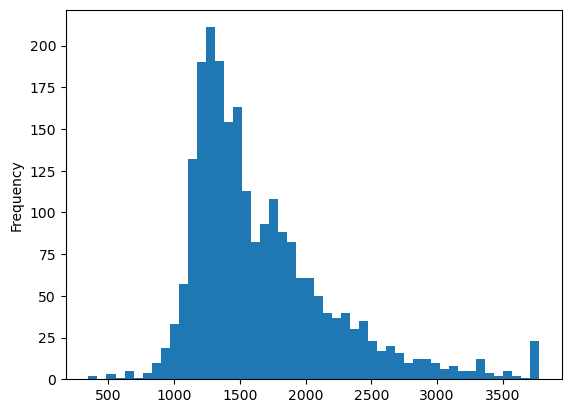

In [9]:
df['Median Gross Rent'].plot.hist(bins=50)

In [10]:
import geopandas as gpd

Next, I imported the Geojson file for Census Tracts in LA County.

In [11]:
tracts=gpd.read_file('Census_Tracts_2020.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [12]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

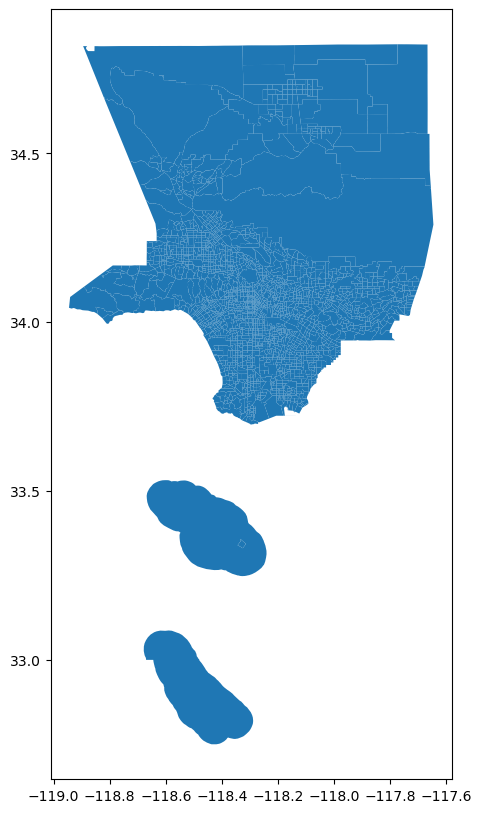

In [13]:
tracts.plot(figsize=(12,10))

In [14]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


Then I looked created a new column in the Geojson file to match the geographic identifier column in the Social Explorer dataset.

In [15]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


Next, I merged the two datasets together. 

In [17]:
tracts_rent=tracts.merge(df,on="FIPS")

In [18]:
tracts_rent.head()

,CT20,geometry,FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Median Gross Rent
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,37,101110,1736.0
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,37,101122,2287.0
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,37,101220,1293.0
3,101300,"POLYGON ((-118.26530 34.25735, -118.26530 34.2...",06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,37,101300,2627.0
4,101400,"POLYGON ((-118.29657 34.25356, -118.29694 34.2...",06037101400,14000US06037101400,Census Tract 1014,"Census Tract 1014, Los Angeles County, California",ca,140,0,ACSSF,3875,6,37,101400,1242.0


And finally, I plotted the median gross rental prices for LA County in a map below. Including limiting the y-axis to exclude the islands. 

(33.55, 35.0)

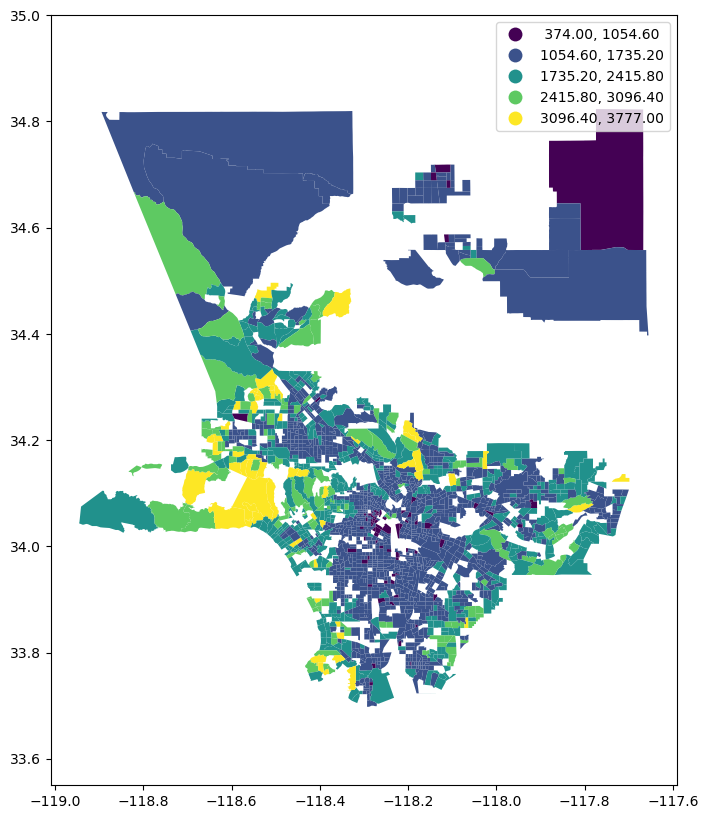

In [19]:
fig = tracts_rent.plot(figsize=(12,10),
                 column='Median Gross Rent',
                 legend=True, 
                 scheme='equal_interval')

fig.set_ylim(33.55, 35)